In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv(r'C:\Users\Yashdeep Sharma\Downloads\amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Rating,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",5,"A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops."
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",8,A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",2,After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,30-Mar-21,2014,NaN,69 min,Documentary,5,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",5,"Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father."


In [115]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
Rating             0
description        0
dtype: int64

# No of rows and columns in data

In [116]:
df.shape

(9668, 13)

In [117]:
#Dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  Rating        9668 non-null   int64 
 12  description   9668 non-null   object
dtypes: int64(2), object(11)
memory usage: 982.0+ KB


In [118]:
df['release_year']=pd.to_datetime(df['release_year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       9668 non-null   object        
 1   type          9668 non-null   object        
 2   title         9668 non-null   object        
 3   director      7586 non-null   object        
 4   cast          8435 non-null   object        
 5   country       672 non-null    object        
 6   date_added    155 non-null    object        
 7   release_year  9668 non-null   datetime64[ns]
 8   rating        9331 non-null   object        
 9   duration      9668 non-null   object        
 10  listed_in     9668 non-null   object        
 11  Rating        9668 non-null   int64         
 12  description   9668 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 982.0+ KB


In [119]:
df['release_year']=df['release_year'].dt.date

In [120]:
df['date_added']=pd.to_datetime(df['date_added'])



# Find the percentage of missing value in every column

In [121]:
df.isnull().sum() *100 / len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        21.534961
cast            12.753413
country         93.049235
date_added      98.396773
release_year     0.000000
rating           3.485726
duration         0.000000
listed_in        0.000000
Rating           0.000000
description      0.000000
dtype: float64

# Divide the column duration into duration_movie and duration_season

In [122]:
df[['value','unit']] = df['duration'].str.split(' ',expand=True)

In [123]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Rating,description,value,unit
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,1970-01-01,NaN,113 min,"Comedy, Drama",5,"A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops.",113,min
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,1970-01-01,13+,110 min,"Drama, International",8,A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.,110,min
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,2021-03-30,1970-01-01,NaN,74 min,"Action, Drama, Suspense",2,After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction,74,min
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,2021-03-30,1970-01-01,NaN,69 min,Documentary,5,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances.",69,min
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,2021-03-30,1970-01-01,NaN,45 min,"Drama, Fantasy",5,"Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father.",45,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1970-01-01,7+,60 min,Comedy,5,New York City street principles get an East Side Kid in trouble at a Civilian Conservation Corps camp.,60,min
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, MURRAY KASH, YSANNE CHURCHMAN",NaN,NaT,1970-01-01,13+,4 Seasons,TV Shows,10,"This is Earth, 2100AD - and these are the adventures of cult hit Space Patrol! Join Galasphere 347 and its intrepid crew on their voyages around the solar system: heroic Captain Dart, elfin Slim, sausage-mad Husky, Irish genius Professor Haggerty, mad Martian parrot Gabbler - and, keeping them all on a tight rein, Colonel Raeburn and his super-efficient secretary, Marla!",4,Seasons
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, Michael Smiley, Enoch Frost",NaN,NaT,1970-01-01,R,90 min,Action,6,"In war-torn Eastern Europe, a world-weary group of mercenaries discover a long-hidden secret in an abandoned WWII bunker.",90,min
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vittori, Pablo Rodríguez Albi, Leonard Kunz, Juanma Muniagurria, Julieta Cardinali, Nazareno Casero, Rita Cortese, Laura Esquivel, Nicolás Furtado, Nicolas Goldschmidt",NaN,NaT,1970-01-01,TV-MA,1 Season,"Drama, Sports",3,"The series tells the story of Diego Maradona, a boy from an Argentine villa who turned into the legendary soccer star.",1,Season


# What is the tme period range of this dataset ? 

In [124]:
min(df['date_added'].dt.date)

C:\Users\YASHDE~1\AppData\Local\Temp/ipykernel_2220/3218220373.py:1: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  min(df['date_added'].dt.date)


datetime.date(2021, 3, 30)

In [125]:
max(df['date_added'].dt.date)

C:\Users\YASHDE~1\AppData\Local\Temp/ipykernel_2220/3105353688.py:1: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.
  max(df['date_added'].dt.date)


datetime.date(2021, 10, 10)

# How many movies and TV Shows are present find both count and percentage

In [126]:
df['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [127]:
df['type'].value_counts() *100 / len(df)

Movie      80.823335
TV Show    19.176665
Name: type, dtype: float64

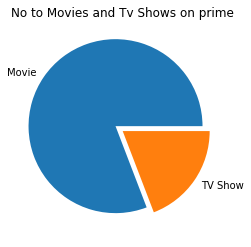

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(df['type'].value_counts().values,labels=df['type'].value_counts().index,explode = [0.1,0.0])
plt.title("No to Movies and Tv Shows on prime")
plt.show()

In [129]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'Rating',
       'description', 'value', 'unit'],
      dtype='object')

In [134]:
df.drop('Action_Movies',axis=1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,Rating,description,value,unit
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,1970-01-01,NaN,113 min,"Comedy, Drama",5,"A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops.",113,min
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,1970-01-01,13+,110 min,"Drama, International",8,A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.,110,min
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,2021-03-30,1970-01-01,NaN,74 min,"Action, Drama, Suspense",2,After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction,74,min
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,2021-03-30,1970-01-01,NaN,69 min,Documentary,5,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances.",69,min
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,2021-03-30,1970-01-01,NaN,45 min,"Drama, Fantasy",5,"Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father.",45,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1970-01-01,7+,60 min,Comedy,5,New York City street principles get an East Side Kid in trouble at a Civilian Conservation Corps camp.,60,min
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, MURRAY KASH, YSANNE CHURCHMAN",NaN,NaT,1970-01-01,13+,4 Seasons,TV Shows,10,"This is Earth, 2100AD - and these are the adventures of cult hit Space Patrol! Join Galasphere 347 and its intrepid crew on their voyages around the solar system: heroic Captain Dart, elfin Slim, sausage-mad Husky, Irish genius Professor Haggerty, mad Martian parrot Gabbler - and, keeping them all on a tight rein, Colonel Raeburn and his super-efficient secretary, Marla!",4,Seasons
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, Michael Smiley, Enoch Frost",NaN,NaT,1970-01-01,R,90 min,Action,6,"In war-torn Eastern Europe, a world-weary group of mercenaries discover a long-hidden secret in an abandoned WWII bunker.",90,min
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vittori, Pablo Rodríguez Albi, Leonard Kunz, Juanma Muniagurria, Julieta Cardinali, Nazareno Casero, Rita Cortese, Laura Esquivel, Nicolás Furtado, Nicolas Goldschmidt",NaN,NaT,1970-01-01,TV-MA,1 Season,"Drama, Sports",3,"The series tells the story of Diego Maradona, a boy from an Argentine villa who turned into the legendary soccer star.",1,Season


In [135]:
op =df['listed_in'].str.split(",",expand=True)

In [136]:
genres = op.rename(columns={0:'genre1',1:'genre2',2:'genre2',3:'genre4',4:'genre5'})

In [137]:
genres

,genre1,genre2,genre2,genre4,genre5
0,Comedy,Drama,None,None,None
1,Drama,International,None,None,None
2,Action,Drama,Suspense,None,None
3,Documentary,None,None,None,None
4,Drama,Fantasy,None,None,None
...,...,...,...,...,...
9663,Comedy,None,None,None,None
9664,TV Shows,None,None,None,None
9665,Action,None,None,None,None
9666,Drama,Sports,None,None,None


In [138]:
c = [df,genres]
final = pd.concat(c,axis=1)

In [139]:
df = final

In [140]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Rating,description,value,unit,Action_Movies,genre1,genre2,genre2,genre4,genre5
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,1970-01-01,NaN,113 min,...,5,"A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops.",113,min,nan,Comedy,Drama,None,None,None
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,1970-01-01,13+,110 min,...,8,A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.,110,min,nan,Drama,International,None,None,None
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,2021-03-30,1970-01-01,NaN,74 min,...,2,After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction,74,min,Action,Action,Drama,Suspense,None,None
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,2021-03-30,1970-01-01,NaN,69 min,...,5,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances.",69,min,nan,Documentary,None,None,None,None
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,2021-03-30,1970-01-01,NaN,45 min,...,5,"Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father.",45,min,nan,Drama,Fantasy,None,None,None


# Which types of movies are present in genre1?

In [141]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Rating,description,value,unit,Action_Movies,genre1,genre2,genre2,genre4,genre5
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,2021-03-30,1970-01-01,NaN,113 min,...,5,"A small fishing village must procure a local doctor to secure a lucrative business contract. When unlikely candidate and big city doctor Paul Lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. As the doctor's time in the village winds to a close, acting mayor Murray French has no choice but to pull out all the stops.",113,min,nan,Comedy,Drama,None,None,None
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2021-03-30,1970-01-01,13+,110 min,...,8,A Metro Family decides to fight a Cyber Criminal threatening their stability and pride.,110,min,nan,Drama,International,None,None,None
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, Richard Jones, Yancey Arias, Noel Gugliemi",United States,2021-03-30,1970-01-01,NaN,74 min,...,2,After a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction,74,min,Action,Action,Drama,Suspense,None,None
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney Spears, Christina Aguilera, more!",United States,2021-03-30,1970-01-01,NaN,69 min,...,5,"Pink breaks the mold once again, bringing her career to a new level in 2013 with a world tour that entertains unlike ever before! Get inside access to ""the girl who got the party started"" with exclusive interviews and rare live performances.",69,min,nan,Documentary,None,None,None,None
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Costigan, Amanda Dickinson, Alison Steadman, Grant Bardsley, Bill Moody, Matthew Scurfield",United Kingdom,2021-03-30,1970-01-01,NaN,45 min,...,5,"Teenage Matt Banting wants to work with a famous but eccentric creature/special effects man named Chancey Bellows. He gets more than he bargained for when one of the creatures, the giant dragon-like Ultragorgon, takes Matt under his wing. Matt is forced to confront his inner monsters while working out his issues with his father.",45,min,nan,Drama,Fantasy,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaT,1970-01-01,7+,60 min,...,5,New York City street principles get an East Side Kid in trouble at a Civilian Conservation Corps camp.,60,min,nan,Comedy,None,None,None,None
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, MURRAY KASH, YSANNE CHURCHMAN",NaN,NaT,1970-01-01,13+,4 Seasons,...,10,"This is Earth, 2100AD - and these are the adventures of cult hit Space Patrol! Join Galasphere 347 and its intrepid crew on their voyages around the solar system: heroic Captain Dart, elfin Slim, sausage-mad Husky, Irish genius Professor Haggerty, mad Martian parrot Gabbler - and, keeping them all on a tight rein, Colonel Raeburn and his super-efficient secretary, Marla!",4,Seasons,nan,TV Shows,None,None,None,None
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, Michael Smiley, Enoch Frost",NaN,NaT,1970-01-01,R,90 min,...,6,"In war-torn Eastern Europe, a world-weary group of mercenaries discover a long-hidden secret in an abandoned WWII bunker.",90,min,Action,Action,None,None,None,None
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vittori, Pablo Rodríguez Albi, Leonard Kunz, Juanma Muniagurria, Julieta Cardinali, Nazareno Casero, Rita Cortese, Laura Esquivel, Nicolás Furtado, Nicolas Goldschmidt",NaN,NaT,1970-01-01,TV-MA,1 Season,...,3,"The series tells the story of Diego Maradona, a 

In [144]:
df[df['type']=='Movie'].genre1.value_counts().head(5)

Drama          1922
Action         1502
Comedy         1253
Documentary     623
Horror          522
Name: genre1, dtype: int64

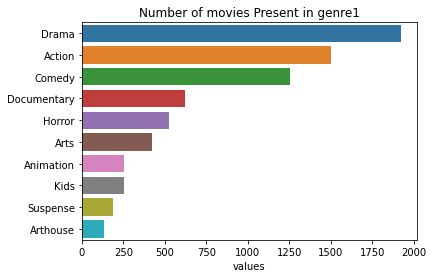

In [145]:
sns.barplot(x = df[df['type']=='Movie'].genre1.value_counts().head(10).values,
        y = df[df['type']=='Movie'].genre1.value_counts().head(10).index,
        data=df)
plt.title("Number of movies Present in genre1")
plt.xlabel('values')
plt.show()

# Which types of T.V Shows are present in gener1 ?

In [147]:
df[df['type']=='TV Show'].genre1.value_counts().head(5)

Drama          294
Documentary    290
TV Shows       263
Animation      242
Comedy         222
Name: genre1, dtype: int64

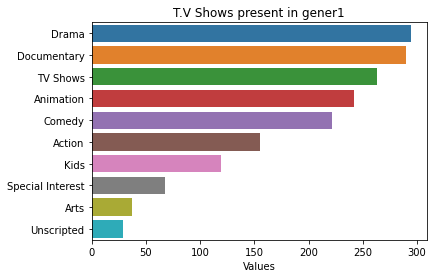

In [148]:
sns.barplot(x=df[df['type']=='TV Show'].genre1.value_counts().head(10).values,
           y = df[df['type']=='TV Show'].genre1.value_counts().head(10).index,
           data=df)
plt.title('T.V Shows present in gener1')
plt.xlabel('Values')
plt.show()

# What is the average time of movie by genre 1?

In [205]:
movies = df[df['type']=='Movie']
movies.groupby('genre1')['value'].describe()

,count,unique,top,freq
genre1,,,,
Action,1502,154,91,52
Adventure,59,37,100,4
Animation,256,84,22,14
Anime,16,11,97,3
Arthouse,131,58,88,6
...,...,...,...,...
Special Interest,120,56,60,15
Sports,5,4,174,2
Suspense,187,69,92,12
